**To evaluate the performance of a linear regression model trained on financial data (specifically, stock market data) to predict the volume of trading based on features such as the opening price, high price, and low price of the stock**

In [9]:
#import required libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [4]:
!pip install pandas openpyxl

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   ------ -------------------------------- 41.0/250.9 kB 281.8 kB/s eta 0:00:01
   ----------------- -------------------- 112.6/250.9 kB 547.6 kB/s eta 0:00:01
   ---------------------------------------  245.8/250.9 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 1.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# Load the dataset
data = pd.read_excel('yahoo_data.xlsx')  # Replace '/content/yahoo_data.xlsx' with the actual dataset file path

# Check the first few rows of the dataset to verify the data format and column names
print(data)

# Extracting relevant columns
selected_columns = ['Open', 'High', 'Low', 'Volume']  # Adjust column names as per your dataset
data = data[selected_columns].dropna()

# Splitting the data into features and target variable
X = data[['Open', 'High', 'Low']]  # Features
y = data['Volume']  # Target variable

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting linear regression model to the training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred = regressor.predict(X_test)

              Date      Open      High       Low    Close*  Adj Close**  \
0     Apr 28, 2023  33797.43  34104.56  33728.40  34098.16     34098.16   
1     Apr 27, 2023  33381.66  33859.75  33374.65  33826.16     33826.16   
2     Apr 26, 2023  33596.34  33645.83  33235.85  33301.87     33301.87   
3     Apr 25, 2023  33828.34  33875.49  33525.39  33530.83     33530.83   
4     Apr 24, 2023  33805.04  33891.15  33726.09  33875.40     33875.40   
...            ...       ...       ...       ...       ...          ...   
1253  May 07, 2018  24317.66  24479.45  24263.42  24357.32     24357.32   
1254  May 04, 2018  23865.22  24333.35  23778.87  24262.51     24262.51   
1255  May 03, 2018  23836.23  23996.15  23531.31  23930.15     23930.15   
1256  May 02, 2018  24097.63  24185.52  23886.30  23924.98     23924.98   
1257  May 01, 2018  24117.29  24117.29  23808.19  24099.05     24099.05   

         Volume  
0     354310000  
1     343240000  
2     321170000  
3     297880000  
4     252

In [10]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Printing the coefficients
print("Coefficients:", regressor.coef_)

# Printing the intercept
print("Intercept:", regressor.intercept_)

# Calculate the number of observations
n = len(y_test)
print("Number of Observations:", n)

# Calculate the Multiple R (which is the square root of R-squared)
multiple_r = r2 ** 0.5
print("Multiple R:", multiple_r)

# Calculate the Adjusted R-squared
p = X_test.shape[1]  # Number of independent variables
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r2)

# Calculate standard deviation of residuals
std_dev = np.sqrt(np.mean((y_pred - y_test) ** 2))
print("Standard Deviation of Residuals:", std_dev)


Root Mean Squared Error: 69157216.53132251
R-squared: 0.4784544950843952
Coefficients: [  20860.52102204  303469.2949289  -327390.73287622]
Intercept: 317706399.763524
Number of Observations: 252
Multiple R: 0.6917040516611097
Adjusted R-squared: 0.47214547687977093
Standard Deviation of Residuals: 69157216.53132251


**These visualizations serve the purpose of evaluating the performance of a regression model, particularly in predicting the volume of a certain stock or financial instrument.                                                                                                                                    
1.Actual vs. Predicted Volume Scatter Plot                                                                                                                     
2.Relationship between Independent Variables and Volume Scatter Plots:**

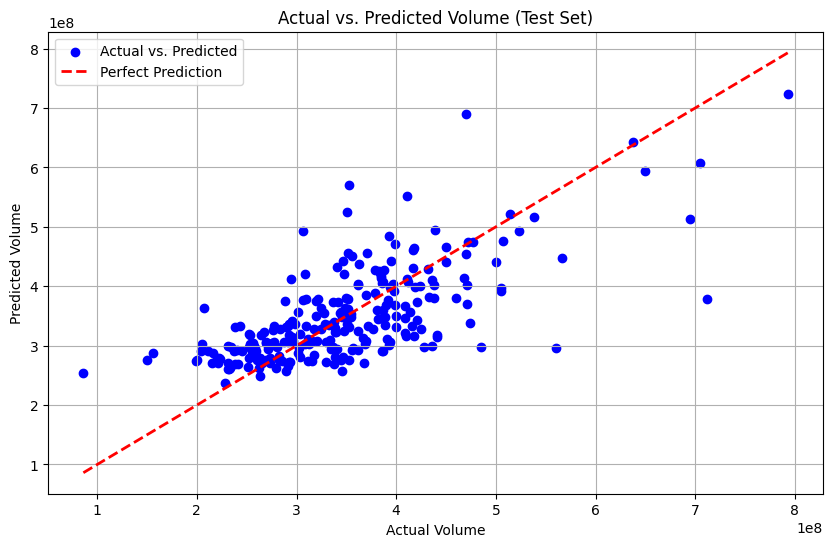

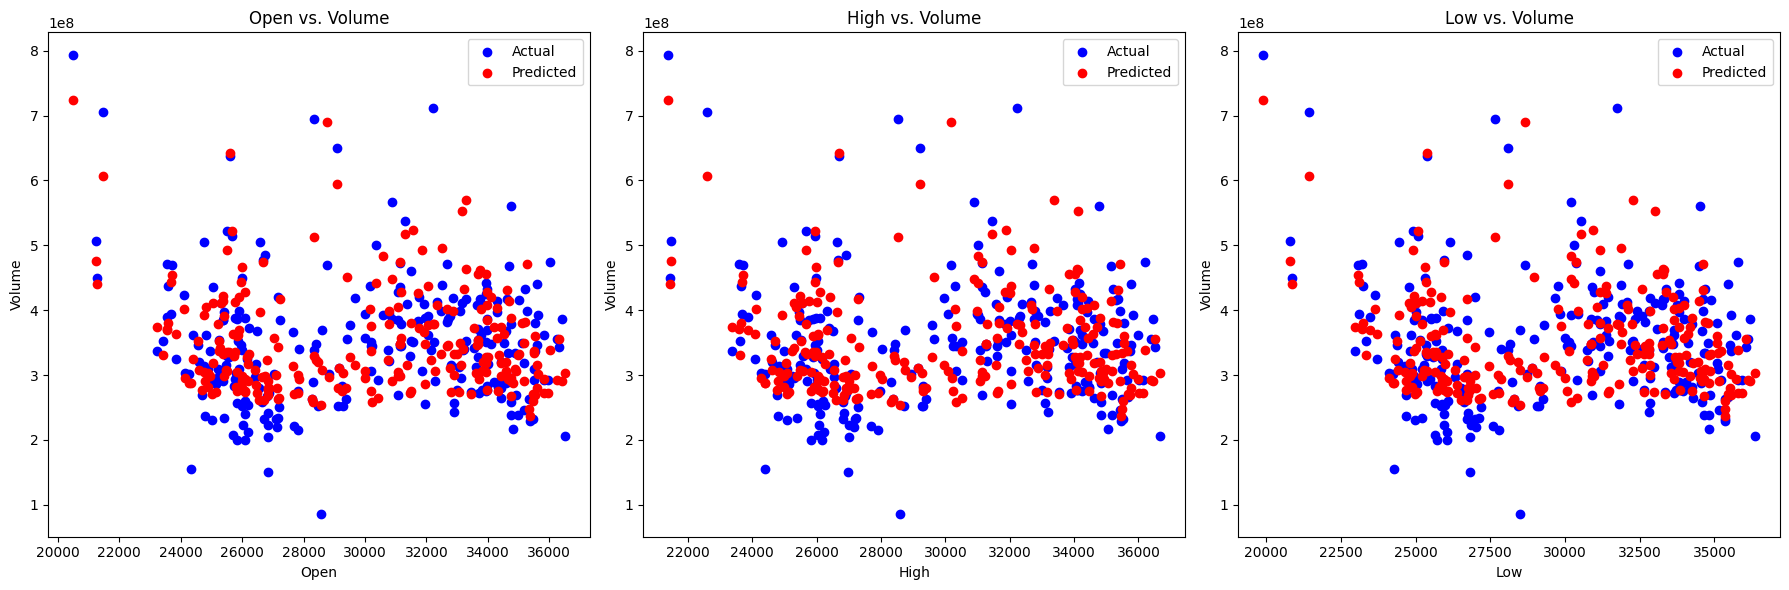

In [11]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted volume
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.title('Actual vs. Predicted Volume (Test Set)')
plt.xlabel('Actual Volume')
plt.ylabel('Predicted Volume')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the relationship between each independent variable and the target variable (Volume)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, column in enumerate(X.columns):
    axs[i].scatter(X_test[column], y_test, color='blue', label='Actual')
    axs[i].scatter(X_test[column], y_pred, color='red', label='Predicted')
    axs[i].set_title(f'{column} vs. Volume')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Volume')
    axs[i].legend()

plt.tight_layout()
plt.show()


**This Python program serves the purpose of analyzing correlations between numerical parameters in a dataset and providing an interpretation of these correlations. Here's a breakdown of what the program does and its purpose**

In [12]:
# Drop non-numeric columns
data_numeric = data.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns

# Calculate correlations between parameters
correlations = data_numeric.corr()

# Print correlations in table format
print("Correlation Table:")
print(correlations)

# Interpretation of correlations
print("\nInterpretation of Correlations:")
for column in correlations.columns:
    print(f"\nCorrelations with {column}:")
    for index, value in correlations[column].items():
        if index != column:
            if value > 0.7:
                print(f"- {index}: Strong positive correlation ({value:.2f})")
            elif value < -0.7:
                print(f"- {index}: Strong negative correlation ({value:.2f})")
            elif value > 0.3:
                print(f"- {index}: Moderate positive correlation ({value:.2f})")
            elif value < -0.3:
                print(f"- {index}: Moderate negative correlation ({value:.2f})")
            elif value > 0:
                print(f"- {index}: Weak positive correlation ({value:.2f})")
            elif value < 0:
                print(f"- {index}: Weak negative correlation ({value:.2f})")
            else:
                print(f"- {index}: No correlation")

Correlation Table:
            Open      High       Low    Volume
Open    1.000000  0.999043  0.998626 -0.088002
High    0.999043  1.000000  0.998198 -0.073388
Low     0.998626  0.998198  1.000000 -0.115077
Volume -0.088002 -0.073388 -0.115077  1.000000

Interpretation of Correlations:

Correlations with Open:
- High: Strong positive correlation (1.00)
- Low: Strong positive correlation (1.00)
- Volume: Weak negative correlation (-0.09)

Correlations with High:
- Open: Strong positive correlation (1.00)
- Low: Strong positive correlation (1.00)
- Volume: Weak negative correlation (-0.07)

Correlations with Low:
- Open: Strong positive correlation (1.00)
- High: Strong positive correlation (1.00)
- Volume: Weak negative correlation (-0.12)

Correlations with Volume:
- Open: Weak negative correlation (-0.09)
- High: Weak negative correlation (-0.07)
- Low: Weak negative correlation (-0.12)


**Generates a heatmap of the correlation matrix for the numeric columns in a dataset**

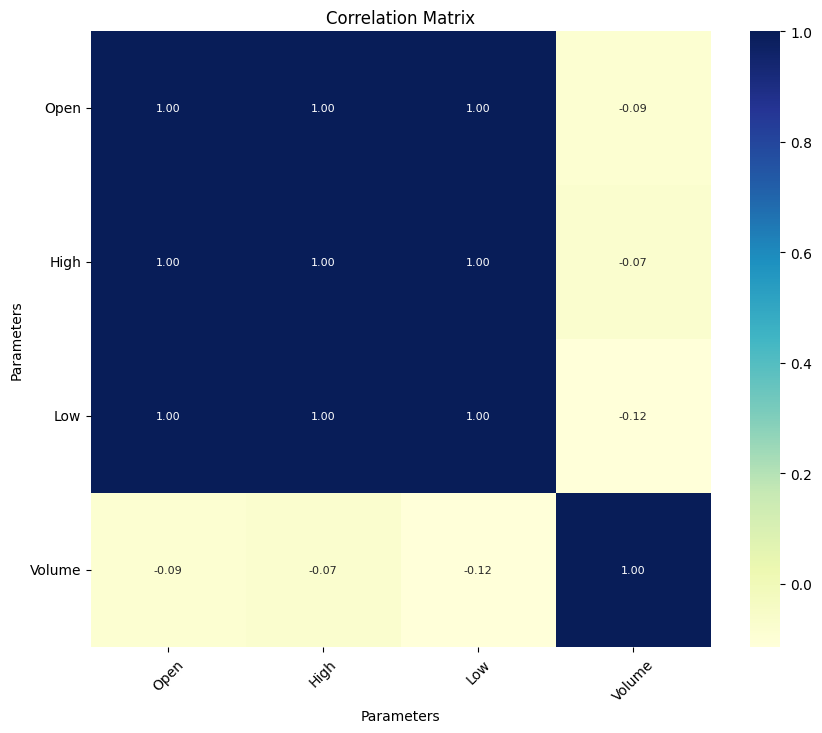

In [14]:
import seaborn as sns
# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='YlGnBu', fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.xlabel('Parameters')
plt.ylabel('Parameters')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

**Visualize and compare the performance of two different models, namely Linear Regression (LR) and Estimated Linear Regression with Machine Learning (ELR-ML). The comparison is based on their Mean Squared Error (MSE) scores.**

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 1. Train Linear Regression (LR) Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting the test set results using Linear Regression
y_pred_lr = lr_model.predict(X_test)

# Calculate MSE for Linear Regression (LR)
mse_lr = mean_squared_error(y_test, y_pred_lr)

### 2. Train Estimated Linear Regression with Machine Learning (ELR-ML) Model
from sklearn.linear_model import Ridge

elr_ml_model = Ridge(alpha=1.0)  # Ridge regression model with regularization parameter alpha=1.0
elr_ml_model.fit(X_train, y_train)

# Predicting the test set results using ELR-ML (Ridge Regression in this case)
y_pred_elr_ml = elr_ml_model.predict(X_test)

# Calculate MSE for ELR-ML
mse_elr_ml = mean_squared_error(y_test, y_pred_elr_ml)

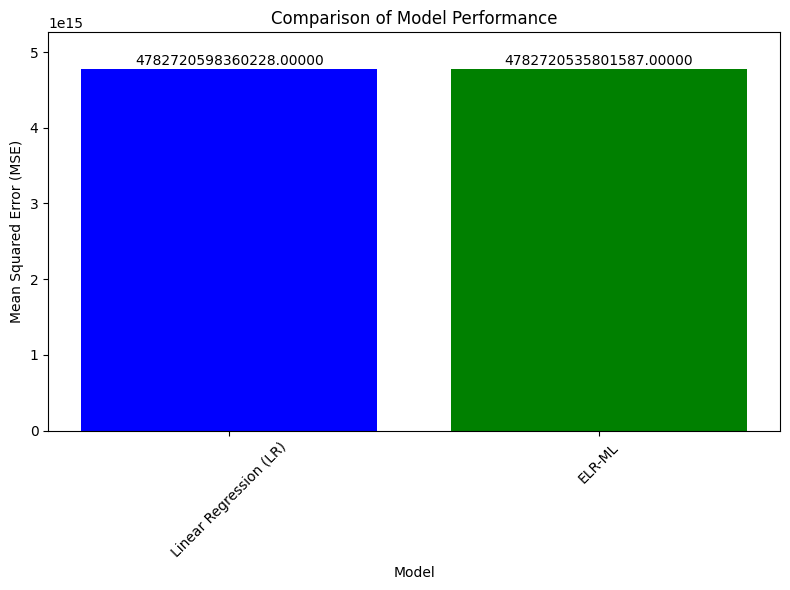

In [30]:
model_names = ['Linear Regression (LR)', 'ELR-ML']
mse_scores = [mse_lr,mse_elr_ml]

# Plot bar graph
plt.figure(figsize=(8, 6))
plt.bar(model_names, mse_scores, color=['blue', 'green'])
plt.title('Comparison of Model Performance')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=45)
plt.ylim(0, max(mse_scores) * 1.1)

# Add text labels on top of bars
for i in range(len(model_names)):
    plt.text(i, mse_scores[i] * 1.01, f'{mse_scores[i]:.5f}', ha='center')
plt.tight_layout()
plt.show()
